In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
from IPython.display import display, HTML

import sys, os, importlib
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import miptlabs as ml
importlib.reload(ml)

importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)

sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)

sp.__version__

'1.1.2.dev'

In [3]:
rho_steel = ml.PQ(7.8*u.g/u.cm**3, is_const=True)
rho_glass = ml.PQ(2.5*u.g/u.cm**3, is_const=True)
g = ml.PQ(9.816*u.m/u.s**2, is_const=True)
S = ml.PQ(10*u.cm, sigma=0.1*u.cm)

In [4]:
data = pd.read_csv('lab2.2.6.csv')
#data = (data[:6])
data['d'] = data.apply(lambda row: ml.PQ(row['d']*u.mm, sigma=0.05*u.mm), axis=1)
data['t_fall_1_1'] = data.apply(lambda row: ml.PQ(row['t_fall_1_1']*u.s, sigma=0.01*u.s), axis=1)
data['t_fall_1_2'] = data.apply(lambda row: ml.PQ(row['t_fall_1_2']*u.s, sigma=0.01*u.s), axis=1)
data['t_fall_2_1'] = data.apply(lambda row: ml.PQ(row['t_fall_2_1']*u.s, sigma=0.01*u.s), axis=1)
data['t_fall_2_2'] = data.apply(lambda row: ml.PQ(row['t_fall_2_2']*u.s, sigma=0.01*u.s), axis=1)
data['t_fall_2_1'] = data['t_fall_2_1']-data['t_fall_1_1']
data['t_fall_2_2'] = data['t_fall_2_2']-data['t_fall_1_2']
data['t_fall'] = data.apply(lambda row: 
                            ml.get_mean([row['t_fall_1_1'],row['t_fall_1_2'],
                                         row['t_fall_2_1'],row['t_fall_2_2']]), axis=1)

data['T'] = data.apply(lambda row: ml.PQ(ml.celsium_to_kelvins(row['T']), sigma=0.1*u.kelvins), axis=1)
data['rho_fluid'] = data.apply(lambda row: ml.PQ(row['rho_fluid']*u.g/u.cm**3, sigma=0.01*u.g/u.cm**3), axis=1)

data['r'] = data['d']/2
data['rho_ball'] = data.apply(lambda row: rho_steel if row['material'] == 'сталь' else rho_glass, axis=1)
data['v_уст'] = data.apply(lambda row: S/row['t_fall'], axis=1)

data['eta'] = ml.pqarray(2/9*data['r']**2*g*(data['rho_ball']-data['rho_fluid'])/data['v_уст']).repr_as(u.pa*u.s)
data['Re'] = ml.pqarray(data['v_уст']*data['r']*data['rho_fluid']/data['eta']).repr_as(1)

In [5]:
data['tau'] = ml.pqarray(2/9*data['r']**2*data['rho_ball']/data['eta']).repr_as(u.s)
# Имеем t >> tau
data['S'] = ml.pqarray(data['v_уст']*data['tau'])


In [6]:
display(data)
with open('lab2.2.6 table.html', 'w', encoding='utf-8') as f:
    f.write(data.to_html())

,material,d,t_fall_1_1,t_fall_1_2,t_fall_2_1,t_fall_2_2,T,rho_fluid,t_fall,r,rho_ball,v_уст,eta,Re,tau,S
0,стекло,2.10±0.05 mm (2.4%),15.680±0.010 s (0.064%),15.740±0.010 s (0.064%),16.100±0.014 s (0.088%),16.480±0.014 s (0.086%),294.45±0.10 K (0.034%),1.260±0.010 g/cm**3 (0.79%),16.00±0.19 s (1.2%),1.050±0.025 mm (2.4%),2.500000 g/cm**3,0.625±0.010 cm/s (1.5%),0.48±0.03 Pa*s (7.0%),0.0173±0.0013 (7.5%),(12.80±1.20)*10^-4 s (9.7%),(8.0±0.8)*10^-4 cm (9.8%)
1,стекло,2.10±0.05 mm (2.4%),15.240±0.010 s (0.066%),14.990±0.010 s (0.067%),15.260±0.014 s (0.093%),15.540±0.014 s (0.091%),294.45±0.10 K (0.034%),1.260±0.010 g/cm**3 (0.79%),15.26±0.11 s (0.74%),1.050±0.025 mm (2.4%),2.500000 g/cm**3,0.655±0.008 cm/s (1.2%),0.45±0.03 Pa*s (6.9%),0.0191±0.0014 (7.4%),(13.50±1.30)*10^-4 s (9.6%),(8.8±0.9)*10^-4 cm (9.7%)
2,стекло,2.10±0.05 mm (2.4%),15.840±0.010 s (0.063%),15.840±0.010 s (0.063%),15.630±0.014 s (0.090%),15.790±0.014 s (0.090%),294.45±0.10 K (0.034%),1.260±0.010 g/cm**3 (0.79%),15.78±0.05 s (0.32%),1.050±0.025 mm (2.4%),2.500000 g/cm**3,0.634±0.007 cm/s (1.1%),0.47±0.03 Pa*s (6.9%),0.0178±0.0013 (7.4%),(13.00±1.30)*10^-4 s (9.6%),(8.3±0.8)*10^-4 cm (9.7%)
3,стекло,2.10±0.05 mm (2.4%),8.240±0.010 s (0.12%),8.150±0.010 s (0.12%),8.170±0.014 s (0.17%),8.410±0.014 s (0.17%),303.35±0.10 K (0.033%),1.256±0.010 g/cm**3 (0.80%),8.24±0.06 s (0.73%),1.050±0.025 mm (2.4%),2.500000 g/cm**3,1.213±0.015 cm/s (1.2%),0.247±0.017 Pa*s (6.9%),0.065±0.005 (7.4%),(24.80±2.40)*10^-4 s (9.6%),(30.10±2.90)*10^-4 cm (9.7%)
4,стекло,2.10±0.05 mm (2.4%),5.830±0.010 s (0.17%),5.860±0.010 s (0.17%),6.230±0.014 s (0.23%),6.170±0.014 s (0.23%),313.25±0.10 K (0.032%),1.251±0.010 g/cm**3 (0.80%),6.02±0.10 s (1.7%),1.050±0.025 mm (2.4%),2.500000 g/cm**3,1.66±0.03 cm/s (2.0%),0.181±0.013 Pa*s (7.1%),0.121±0.009 (7.8%),(3.4±0.3)*10^-3 s (9.8%),(5.6±0.6)*10^-3 cm (10.0%)
5,стекло,2.10±0.05 mm (2.4%),3.110±0.010 s (0.32%),3.150±0.010 s (0.32%),3.390±0.014 s (0.42%),3.380±0.014 s (0.42%),323.15±0.10 K (0.031%),1.250±0.010 g/cm**3 (0.80%),3.26±0.07 s (2.3%),1.050±0.025 mm (2.4%),2.500000 g/cm**3,3.07±0.08 cm/s (2.5%),0.098±0.007 Pa*s (7.2%),0.41±0.03 (8.1%),(6.3±0.6)*10^-3 s (9.9%),0.0192±0.0020 cm (10%)
6,стекло,2.10±0.05 mm (2.4%),2.050±0.010 s (0.49%),2.140±0.010 s (0.47%),2.200±0.014 s (0.64%),2.200±0.014 s (0.64%),333.15±0.10 K (0.030%),1.245±0.010 g/cm**3 (0.80%),2.15±0.04 s (1.7%),1.050±0.025 mm (2.4%),2.500000 g/cm**3,4.66±0.09 cm/s (2.0%),0.065±0.005 Pa*s (7.1%),0.94±0.07 (7.8%),(9.4±0.9)*10^-3 s (9.8%),0.044±0.004 cm (10.0%)
7,сталь,0.70±0.05 mm (7.1%),25.770±0.010 s (0.039%),25.740±0.010 s (0.039%),26.110±0.014 s (0.054%),26.330±0.014 s (0.054%),294.45±0.10 K (0.034%),1.260±0.010 g/cm**3 (0.79%),25.99±0.14 s (0.55%),0.350±0.025 mm (7.1%),7.800000 g/cm**3,0.385±0.004 cm/s (1.1%),0.45±0.09 Pa*s (20%),(3.7±0.8)*10^-3 (22%),(4.70±1.30)*10^-4 s (29%),(1.8±0.5)*10^-4 cm (29%)
8,сталь,0.60±0.05 mm (8.3%),33.680±0.010 s (0.030%),33.520±0.010 s (0.030%),44.100±0.014 s (0.032%),44.300±0.014 s (0.032%),294.45±0.10 K (0.034%),1.260±0.010 g/cm**3 (0.79%),39±3 s (7.9%),0.300±0.025 mm (8.3%),7.800000 g/cm**3,0.257±0.020 cm/s (7.9%),0.50±0.12 Pa*s (25%),(1.9±0.5)*10^-3 (27%),(3.10±1.10)*10^-4 s (34%),(8.00±2.80)*10^-5 cm (35%)
9,сталь,0.80±0.05 mm (6.2%),25.670±0.010 s (0.039%),25.730±0.010 s (0.039%),26.300±0.014 s (0.054%),26.390±0.014 s (0.054%),294.45±0.10 K (0.034%),1.260±0.010 g/cm**3 (0.79%),26.02±0.19 s (0.72%),0.400±0.025 mm (6.2%),7.800000 g/cm**3,0.384±0.005 cm/s (1.2%),0.59±0.11 Pa*s (18%),(3.3±0.6)*10^-3 (19%),(4.70±1.20)*10^-4 s (25%),(1.8±0.4)*10^-4 cm (25%)


Коэффициенты прямой [ 4994.02770974   -17.74038916] [156.35262010167, 3.4698216172645104e-06]
Энергия активации (6.9±0.6)*10^-20 J/mol (9.2%)


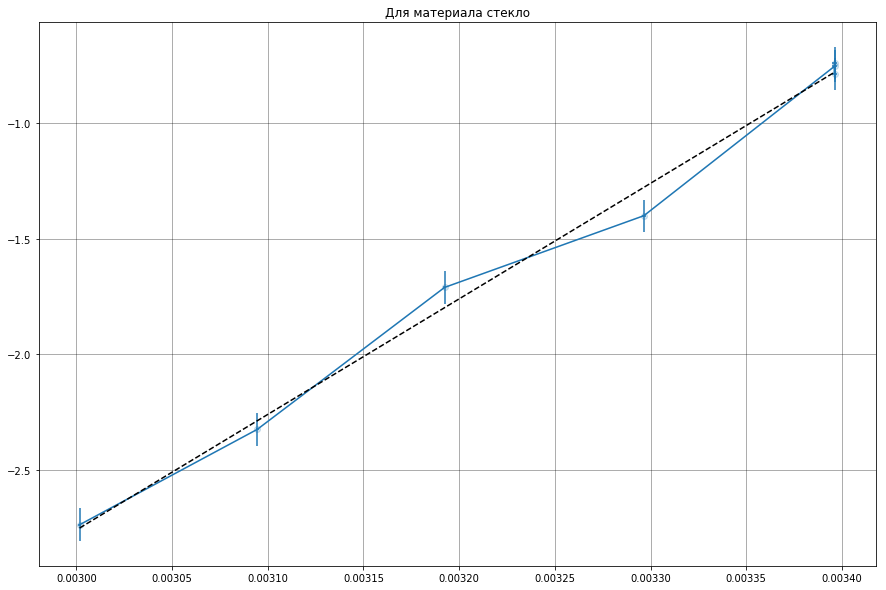

Коэффициенты прямой [ 5578.19287561   -19.6487977 ] [284.26414326241229, 6.30847035798768e-06]
Энергия активации (7.7±0.7)*10^-20 J/mol (9.3%)


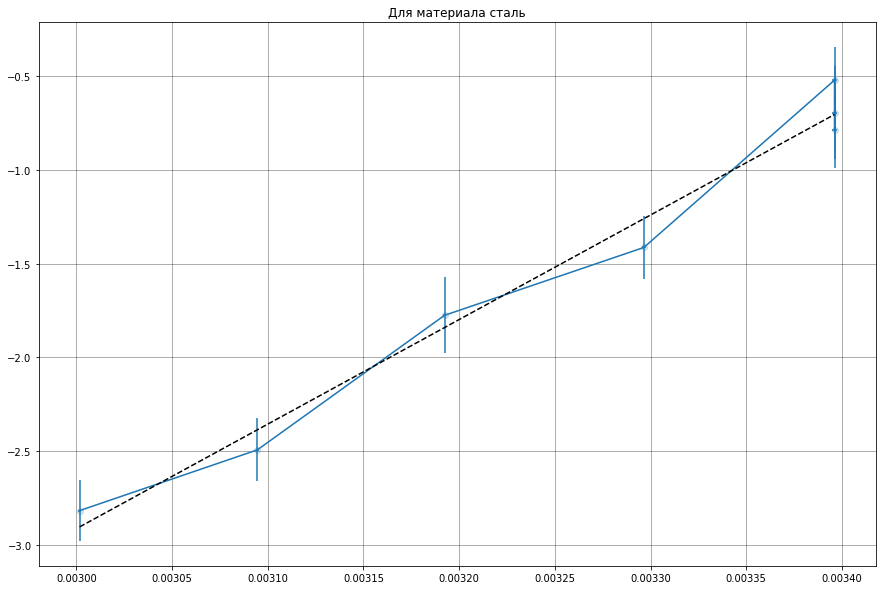

In [7]:


for material in data['material'].unique():
    plt.figure(figsize=(15,10))
    plt.title('Для материала %s'%material)
    dat = data[data['material']==material].sort_values(by='T')
    #display(dat)
    
    ols_coefs, ols_errors = ml.OLS(1/ml.pqarray(dat['T']), np.log(ml.pqarray(dat['eta'])))
    print('Коэффициенты прямой', ols_coefs, ols_errors)
    coef = ml.PQ(ols_coefs[0], sigma=ols_errors[0])
    W = (u.boltzmann_constant*coef*u.K/u.mol).repr_as(u.joule/u.mol).add_sigma(6e-21*u.joule/u.mol)
    print('Энергия активации', W)
    
    #plt.xlim(xmin=0)
    #plt.ylim(ymin=0)
    #plt.xlim(xmin=ml.PQ(0/u.K, is_const=True))
    #plt.ylim(ymin=ml.PQ(0, is_const=True))
    ml.plt_pq(1/ml.pqarray(dat['T']), np.log(ml.pqarray(dat['eta'])), ols=True)
    #ml.plt_pq(1/ml.pqarray(dat['T']), np.log(ml.pqarray(dat['eta']).val_float), ols=True)
    plt.show()

Табличное значение $(8.341 \pm 0.087) \cdot 10^{–20} \frac{Дж}{моль}$. По порядку величины сходится, но экспериментальное значение немного меньше. Возможно, это связано с тем, что у нас был глицерин другой концентрации. Мы же брали табличную плотность, но работали не с табличным глицерином. Погрешность же связана в основном со статистической погрешностью измерений секундомером (скорость реакции).